In [62]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_csv("/content/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [65]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


<Axes: >

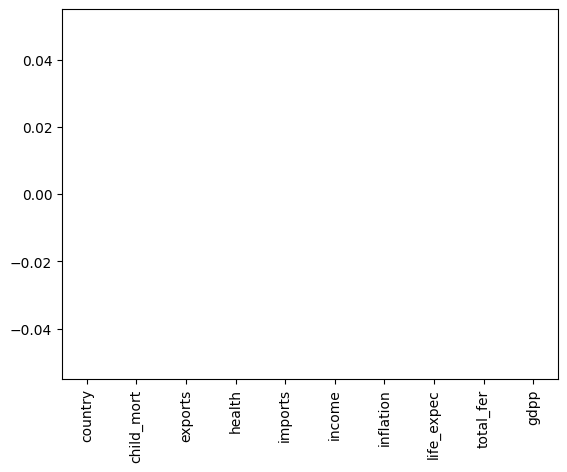

In [67]:
missing_values = (df.isnull().sum()/len(df))*100
missing_values.plot(kind="bar")

In [70]:
df.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


In [71]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [72]:
cols = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[cols] = scaler.fit_transform(df[cols])
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [73]:
inputs = df[cols]
inputs.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [74]:
### Model Creation
from sklearn.cluster import KMeans

k_value = range(1,11)
sse = []
for k in k_value:
  km = KMeans(n_clusters=k)
  km.fit(inputs)
  sse.append(km.inertia_)
sse

[42.79871877568751,
 25.94736093352987,
 19.351982525760516,
 17.697304365987776,
 15.624177926635817,
 14.08149162950427,
 13.254436692119699,
 11.55964989745706,
 11.284515022028184,
 10.59007721243122]

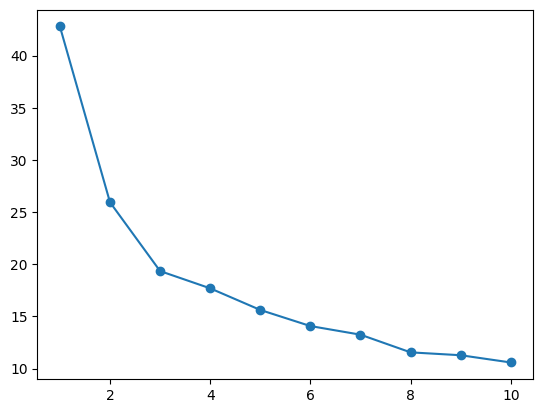

In [77]:
plt.plot(k_value,sse,marker="o")
plt.show()

In [78]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(inputs)
df["cluster"] = y_predicted
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,2
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,2
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,2


In [79]:
df0 = df[df["cluster"] == 0]
df1 = df[df["cluster"] == 1]
df2 = df[df["cluster"] == 2]

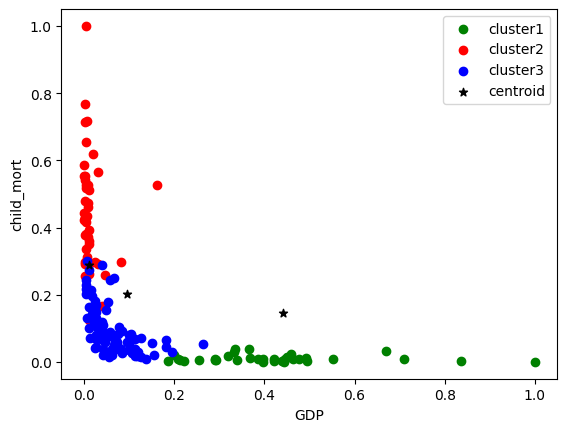

In [85]:
plt.scatter(df0["gdpp"],df0["child_mort"],color="green",label="cluster1")
plt.scatter(df1["gdpp"],df1["child_mort"],color="red",label="cluster2")
plt.scatter(df2["gdpp"],df2["child_mort"],color="blue",label="cluster3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*",label="centroid")
plt.xlabel("GDP")
plt.ylabel("child_mort")
plt.legend()
plt.show()

In [87]:
df1["country"].unique()

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

In [88]:
df0["country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand',
       'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

In [89]:
df2["country"].unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania',
       'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Slovak Republic', 'South Africa', 'Sri L

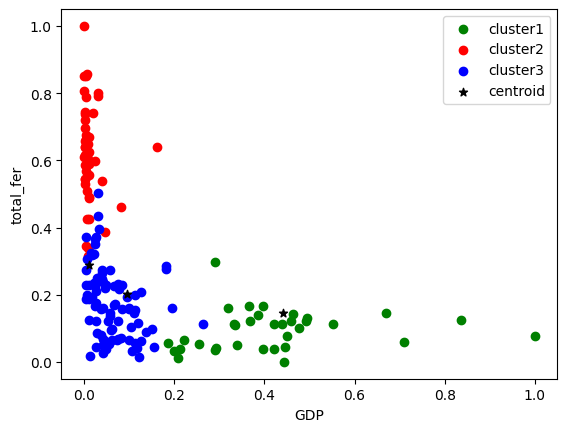

In [91]:
plt.scatter(df0["gdpp"],df0["total_fer"],color="green",label="cluster1")
plt.scatter(df1["gdpp"],df1["total_fer"],color="red",label="cluster2")
plt.scatter(df2["gdpp"],df2["total_fer"],color="blue",label="cluster3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*",label="centroid")
plt.xlabel("GDP")
plt.ylabel("total_fer")
plt.legend()
plt.show()

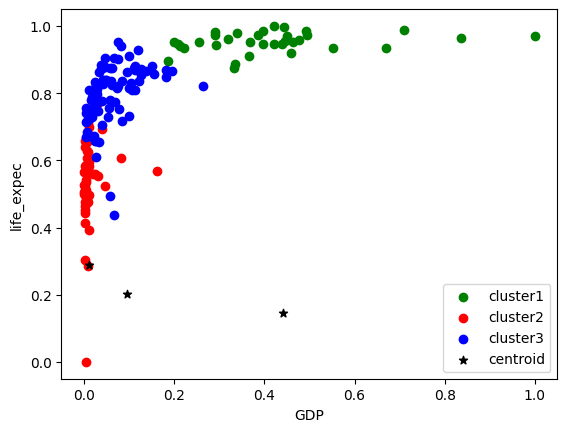

In [92]:
plt.scatter(df0["gdpp"],df0["life_expec"],color="green",label="cluster1")
plt.scatter(df1["gdpp"],df1["life_expec"],color="red",label="cluster2")
plt.scatter(df2["gdpp"],df2["life_expec"],color="blue",label="cluster3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*",label="centroid")
plt.xlabel("GDP")
plt.ylabel("life_expec")
plt.legend()
plt.show()

In [93]:
df1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
17,Benin,0.527751,0.118520,0.142324,0.213495,0.009735,0.047084,0.585799,0.664038,0.005030,1
25,Burkina Faso,0.552093,0.095507,0.306401,0.169801,0.006600,0.101839,0.508876,0.744479,0.003283,1
26,Burundi,0.443038,0.044079,0.608452,0.224994,0.001246,0.152574,0.504931,0.805994,0.000000,1
28,Cameroon,0.513145,0.110515,0.206339,0.154852,0.016488,0.056557,0.497041,0.624606,0.010299,1
31,Central African Republic,0.712756,0.058487,0.134866,0.151978,0.002243,0.057481,0.303748,0.640379,0.002052,1
32,Chad,0.717624,0.183555,0.169049,0.249716,0.010620,0.097958,0.481262,0.858044,0.006357,1
36,Comoros,0.416748,0.082000,0.167806,0.296860,0.006439,0.074670,0.666667,0.567823,0.005135,1
37,"Congo, Dem. Rep.",0.552093,0.205067,0.379117,0.284787,0.000000,0.231125,0.500986,0.850158,0.000983,1
